# Amazon Chronos-T5 Model for Stock Price Prediction

This notebook demonstrates the use of Amazon's Chronos-T5-small model for forecasting TSLA stock prices.

**Model**: [amazon/chronos-t5-small](https://huggingface.co/amazon/chronos-t5-small)

**Features**:
- Time series forecasting with confidence intervals
- Performance evaluation using MAE, MSE, and RMSE
- Results comparison with other models

In [1]:
import sys, os
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

=== Chronos Forecast Runner ===

🧪 Train: 2025-02-03 → 2025-06-20 (rows=96)
🧾 Test:  2025-06-23 → 2025-06-27 (rows=5)
Chronos forecasting failed: 
Plot saved to /Users/hwang-yejin/Desktop/Financial Time Series Forecasting with Deep Learning Models and Social Media Sentiment/results/NVDA_Chronos_forecast.png


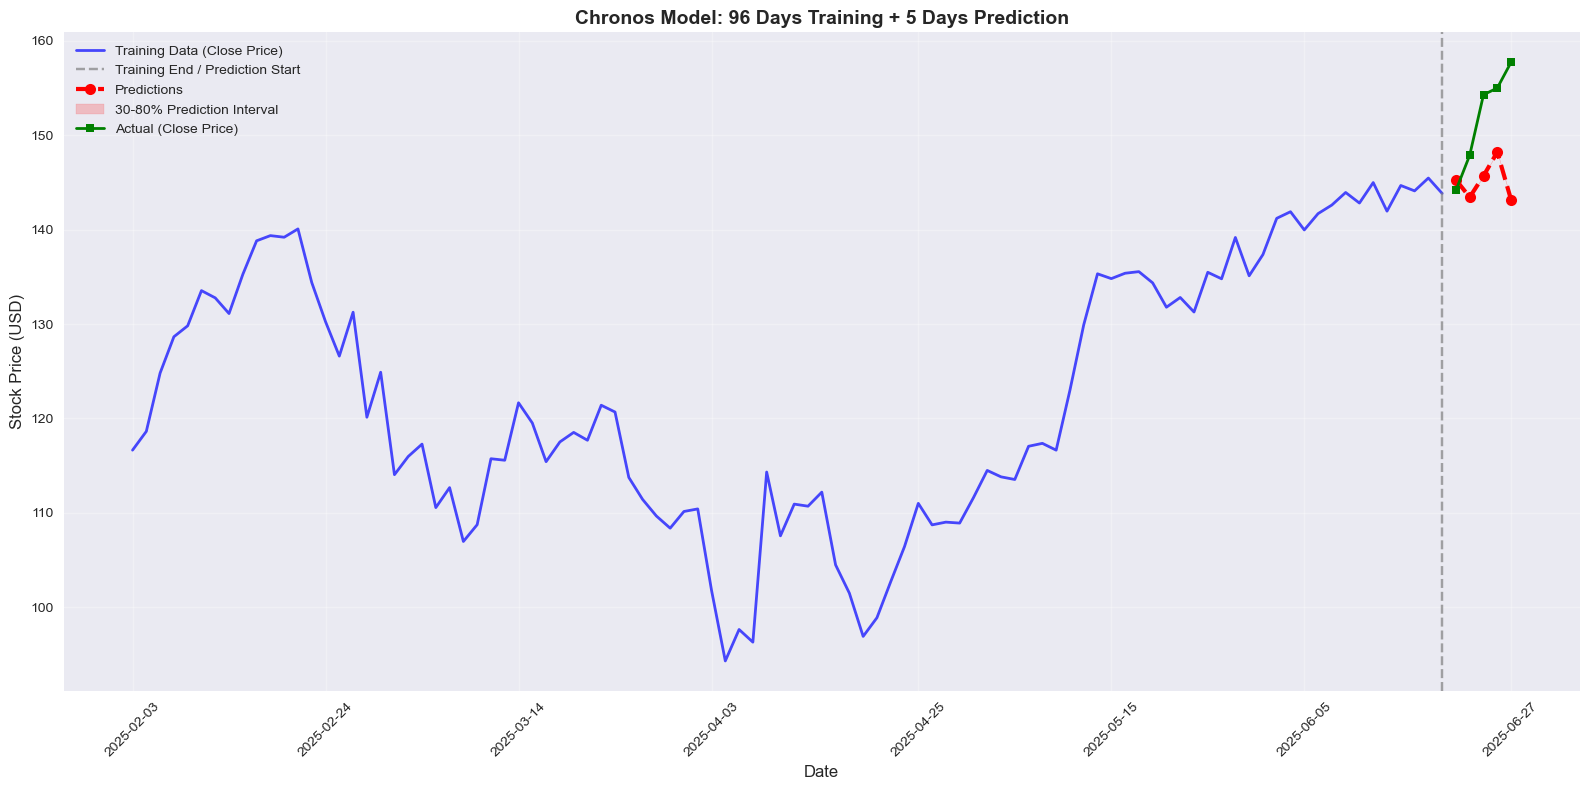

Forecast Performance Metrics:
MAE:  7.10
MSE:  70.67
RMSE: 8.41
MAPE: 4.59%
DA:   0.000
Results saved to matrix successfully!
                    MAE         MSE       RMSE      MAPE   DA
ARIMA          4.970876   43.679190   6.609023  3.261838  0.0
TimesFM        6.822006   68.188286   8.257620  4.501396  0.0
Chronos        7.102666   70.669240   8.406500  4.592989  0.0
TFT_baseline  14.211411  206.403961  14.366766  9.359686  0.0
TFT_Reddit     1.570996    3.020256   1.737888  1.042732  1.0
Execution time: 10.34 seconds


In [2]:
from models.chronos_nvda import main as chronos_nvda_main
import time

start_time = time.time()
chronos_nvda_main(train_start='2025-02-01', context_len=96, test_days=5, use_model=True, device='cpu')
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

In [3]:
# Save/append execution time to a unified matrix under results/
import os, pickle, pathlib
import pandas as pd

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
results_dir = os.path.join(PROJECT_ROOT, 'results')
os.makedirs(results_dir, exist_ok=True)

ticker = 'NVDA'
model_name = 'Chronos'
pkl_path = pathlib.Path(results_dir) / f'{ticker}_execution_time.pkl'
csv_path = pathlib.Path(results_dir) / f'{ticker}_execution_time_matrix.csv'

# Ensure execution_time exists
try:
  execution_time
except NameError:
  execution_time = None

if execution_time is None:
  print('⚠️ execution_time is not defined; skipped saving.')
else:
  # Load existing
  try:
    if pkl_path.exists():
      with open(pkl_path, 'rb') as f:
        exec_df = pickle.load(f)
    else:
      exec_df = pd.DataFrame(columns=['Execution Time'])
  except Exception:
    exec_df = pd.DataFrame(columns=['Execution Time'])

  # Append/update row
  exec_df.loc[model_name] = [execution_time]

  # Save
  with open(pkl_path, 'wb') as f:
    pickle.dump(exec_df, f)
  exec_df.to_csv(csv_path, index=True)

  print('\nTotal Execution Time Matrix:')
  print(exec_df)


Total Execution Time Matrix:
                           Execution Time
ARIMA                            9.835926
TimesFM                         19.448323
Chronos                         10.341340
TFT_baseline                    49.900816
TFT_with_Reddit_Sentiment      216.660867
